In [54]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre

Aufgabe 0:
- Teams auf Slack bekannt geben (anmelden)

Aufgabe 1:
Teil 1:
- Mehrdimensionale Lineare Regression auf einem Dat ensatz (https://github.com/ageron/handson-ml/blob/master/datasets/housing/)
- Vorverarbeitung der Daten (Skalierung, kategorische Attribute: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Aufteilung in Test & Train
- Berechnung der Fehler der Vorhersage auf dem Test-Datensatz
- Anpassung der Inputdaten (Feature Engineering)housin
- Niedrigster MSE auf einem (für alle der gleiche) Test-Datensatz gewinnt

In [126]:
data = pd.read_csv("housing.csv") 

In [127]:
data_original = pd.DataFrame()
data_original = data
print(len(data_original))

#Eliminieren der NaN-Datensätze:
data_cleaned = data_original.dropna(axis=0, how='any')

print(len(data_cleaned))
n_dropped = len(data_original)-len(data_cleaned)
print(n_dropped ,'Datensätze entfernt.')

20640
20433
207 Datensätze entfernt.


In [132]:
data = data_cleaned

In [141]:
# One-hot-encoder
# Encoden des diskreten Merkmals ocean-proximity

housing_cat = data["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
housing_cat_1hot.toarray()

data['ocean_proximity'].housing_cat_1hot.toarray()

AttributeError: 'Series' object has no attribute 'housing_cat_1hot'

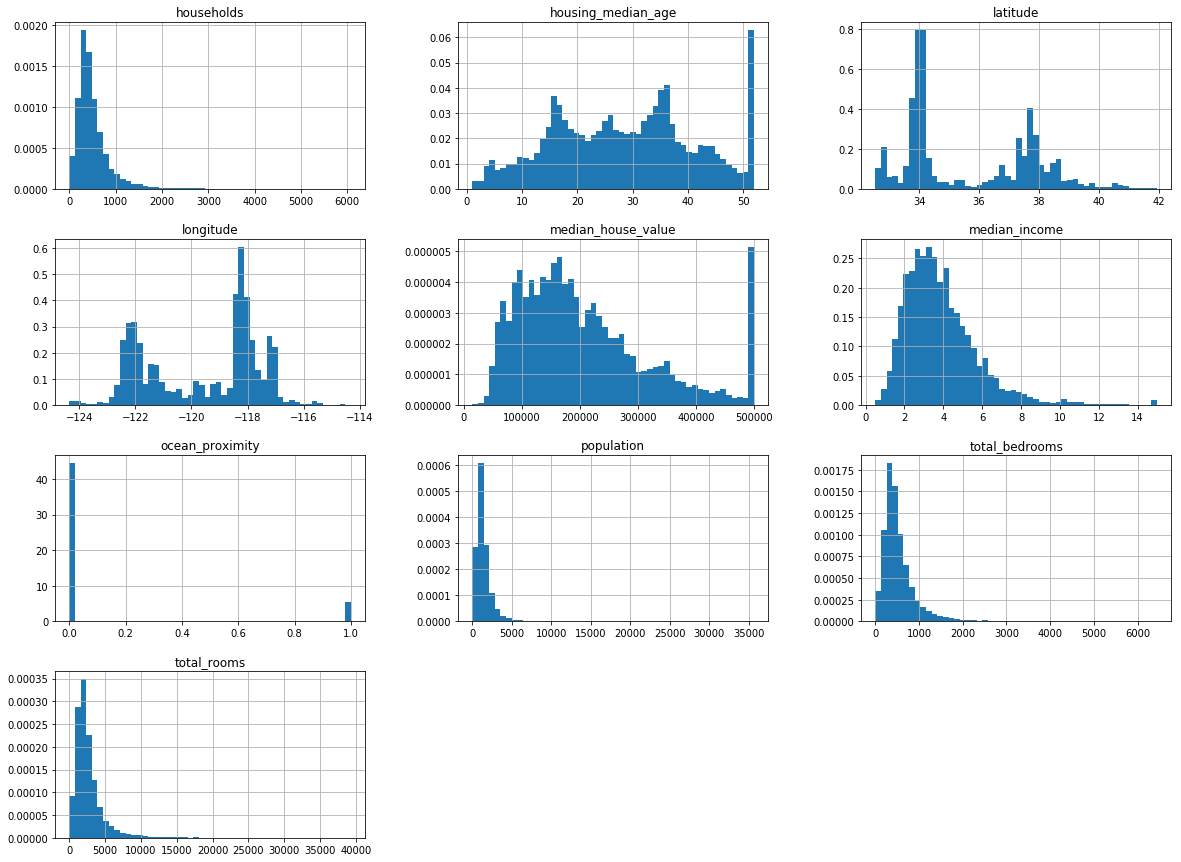

In [74]:
data.hist(bins=50, density=True, figsize=(20,15));

In [60]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.110950
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.314077
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


In [62]:
corr_matrix = data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.474489
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.358771
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.255172
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.023022
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.019873
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.060880
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.010093
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.056197
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.160284
ocean_proximity,-0.474489,0.358771,0.255172,-0.023022,-0.019873,-0.060880,-0.010093,0.056197,0.160284,1.000000


In [90]:
import sklearn.preprocessing as pre
scaler = pre.StandardScaler()
pre.StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_values = scaler.fit_transform(data[data.isnull().any(axis=1) == False])
scaled_data = pd.DataFrame(scaled_values)
scaled_data.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04
mean,-3.337466e-15,6.980827e-16,-7.584704e-16,2.192776e-16,2.035816e-16,-2.316367e-16,1.299940e-16,3.832505e-16,-1.025841e-16,-3.222574e-14
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385447e+00,-1.447937e+00,-2.194584e+00,-1.205604e+00,-1.274093e+00,-1.254828e+00,-1.303810e+00,-1.775054e+00,-1.662139e+00,-3.535242e-01
25%,-1.112692e+00,-7.972780e-01,-8.444662e-01,-5.429688e-01,-5.740034e-01,-5.629702e-01,-5.739976e-01,-6.884113e-01,-7.568419e-01,-3.535242e-01
50%,5.393926e-01,-6.428050e-01,2.913923e-02,-2.331597e-01,-2.441308e-01,-2.285134e-01,-2.365573e-01,-1.762077e-01,-2.353266e-01,-3.535242e-01
75%,7.789699e-01,9.768213e-01,6.644886e-01,2.317829e-01,2.589843e-01,2.621409e-01,2.735268e-01,4.595713e-01,5.010323e-01,-3.535242e-01
max,2.625711e+00,2.956885e+00,1.855769e+00,1.678713e+01,1.401871e+01,3.023088e+01,1.460297e+01,5.859665e+00,2.539456e+00,2.828661e+00


In [77]:
# Ermittlung fehlernder Werte für total_bedrooms
# data[data['total_bedrooms' == 'no_value']]
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,1.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,1.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,1.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,1.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,1.0
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,1.0
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,0.0
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,0.0
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,0.0
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
data.head()

In [78]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.110950
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.314077
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000
